Likelihood each hypothesis assigns to each data point in it 
H1: 1/50
H2: 1/50
H3: 1/10
H4: 1/25
H5: 1/20
H6: 1/10


Likelihood each hypothesis assigns to each data point NOT in it 
H1: 0
H2: 0
H3: 0
H4: 0
H5: 0
H6: 0
5056


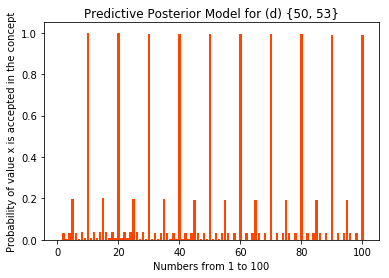

In [3]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt

#Finds prime numbers upto n, including n
def prime_finder(n):
    prime_candidates = [True for _ in range(0, n + 1)]
    p = 2

    while p ** 2 <= n:
        if prime_candidates[p] == True:
            for i in range(p * p, n + 1, p):
                prime_candidates[i] = False
        p += 1

    prime = []

    for i in range(2, n + 1):
        if prime_candidates[i] == True:
            prime.append(i)

    return prime

#hypotheses
H1 = [i for i in range(1, 101) if i%2 == 0]
H2 = [i for i in range(1, 101) if i%2 == 1]
H3 = [i for i in range(1, 101) if i // i ** (1/2) == i ** (1/2)]
H4 = prime_finder(100)
H5 = [i for i in range(1, 101) if i % 5 == 0]
H6 = [i for i in range(1, 101) if i % 10 == 0]

#Q1
def p_DH(x, h):
    p = 1
    for each in x:
        if each in h:
            p = p * 1 / len(h)
        else:
            p = 0
            break
    return p

print("Likelihood each hypothesis assigns to each data point in it ")
print("H1: 1/{}".format(len(H1)))
print("H2: 1/{}".format(len(H2)))
print("H3: 1/{}".format(len(H3)))
print("H4: 1/{}".format(len(H4)))
print("H5: 1/{}".format(len(H5)))
print("H6: 1/{}".format(len(H6)))
print("\n")
print("Likelihood each hypothesis assigns to each data point NOT in it ")
print("H1: 0")
print("H2: 0")
print("H3: 0")
print("H4: 0")
print("H5: 0")
print("H6: 0")

#Q2

H_all = [H1, H2, H3, H4, H5, H6]
pred_val = []
        
H_range = []

def H_range_generator():
    for m in range(1, 101):
        for n in range(m, 101):
            if m != n:
                H_range.append(list(range(m, n+1)))
            else:
                H_range.append(list(range(m, m+1)))

H_range_generator()

def pred(x):
    p_H = 1/6
    p_H_range = 1/6/len(H_range)

    p_D = sum([p_DH(x, each) * p_H for each in H_all])
    p_HD_all = [p_DH(x, h) * p_H / p_D if p_D!=0 else 0 for h in H_all if p_D != 0] 

    H_HD_pair = list(zip(H_all, p_HD_all))
    for i in range(1, 101):
        pred = 0
        for each in H_HD_pair:
            h = each[0]
            p_hd = each[1]

            if i in h:
                pred += 1 * p_hd
            else:
                pred += 0 * p_hd
        pred_val.append(pred)
        

#Q3

H_all = [H1, H2, H3, H4, H5, H6]
pred_val = []
        
H_range = []

def H_range_generator():
    for m in range(1, 101):
        for n in range(m, 101):
            if m != n:
                H_range.append(list(range(m, n+1)))
            else:
                H_range.append(list(range(m, m+1)))

H_range_generator()

pair = []
def pred_with_range(x):
    p_H = 1/7
    p_H_range = 1/7/len(H_range)

    p_D = sum([p_DH(x, each) * p_H for each in H_all] + [p_DH(x, each) * p_H_range for each in H_range])
    p_HD_all = [p_DH(x, h) * p_H / p_D if p_D!=0 else 0 for h in H_all if p_D != 0] + [p_DH(x, h) * p_H_range / p_D if p_D != 0 else 0 for h in H_range]

    H_HD_pair = list(zip(H_all + H_range, p_HD_all))
    print(len(H_HD_pair))
    for i in range(1, 101):
        pred = 0
        for each in H_HD_pair:
            h = each[0]
            p_hd = each[1]

            if i in h:
                pred += 1 * p_hd
            else:
                pred += 0 * p_hd
        pred_val.append(pred)
        
pred_with_range([10, 20])
x = [i for i in range(1, 101)]
y = pred_val
plt.xlabel("Numbers from 1 to 100")
plt.ylabel("Probability of value x is accepted in the concept")
plt.title('Predictive Posterior Model for (d) {50, 53}')
plt.bar(x, y, color='orangered')

plt.savefig("4.png")
plt.show()
